# Admisión de alumnos en la universidad utilizando random forest

---



Partiendo de la lista de alumnos que tienen la oportunidad de entrar en la universidad como conjunto de datos, utilizaremos un algoritmo de machine learning de **random forest** con el objetivo de generar un modelo para predecir la probabilidad de ingreso en la universidad.

Este mismo ejercicio se ha realizado ya con modelos de regresión lineal, por lo tanto compararemos la tasa de error y la precisión de todos los modelos.

### Importar las librerías necesarias y lectura del conjunto de datos

*   En primer lugar, se importan las librerias necesarias de Python para el tratamiento de los datos, generación de gráficas y generación del modelo.

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score 
%matplotlib inline

* En segundo lugar, se realiza la lectura del fichero en el que se encuentra el conjunto de datos, la información del fichero .csv ahora se copia a una variable o instancia DataFrame de Pandas utilizando el método ***read_csv()***.

In [0]:
dataset = pd.read_csv('admission.csv')

* Después podemos visualizar nuestro DataFrame de Pandas que hemos obtenido del fichero .csv.

In [3]:
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### Visualización de tipos de datos en el conjunto de datos

Visualización del tipo de dato que tienen las variables del conjunto de datos antes de realizar cualquier tratamiento de los mismos.

In [4]:
dataset.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### Validación de datos no disponibles en el conjunto de datos

Una vez tenemos los datos en el DataFrame de Pandas debemos validar si hay datos no disponibles.

In [5]:
dataset.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Correlaciones entre las variables del conjunto de datos

Antes de mostrar las correlaciones vamos a eliminar la variable 'Serial No.' ya que es un identificador o clave y por lo tanto tendrá baja correlación con la variable de salida 'Chance of Admit '

Observamos las correlaciones existentes entre todas las variables. Utilizando el método ***corr()*** de nuestro DataFrame obtenemos una tabla con todas las combinaciones entre las variables.

In [6]:
dataset.drop(["Serial No."], axis=1, inplace=True)
correlacion = dataset.corr()
display(correlacion)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Correlaciones en forma de tabla de mapa de calor:

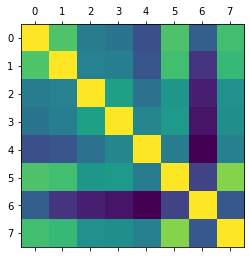

In [7]:
plt.matshow(correlacion)

### Selección de variables para el modelo

Seleccionamos las siete variables de entrada, del mismo modo que realizamos en el ejercicio de regresión lineal múltiple.

In [8]:
x = dataset.drop(["Chance of Admit "], axis = 1)
y = dataset['Chance of Admit ']
print("Número de observaciones del dataset:", y.shape[0])

Número de observaciones del dataset: 500


### Entrenamiento y prueba del modelo

Antes de generar el modelo debemos dividir las observaciones del conjunto de datos en dos, una parte para entrenar el algoritmo (train) y otra para probarlo (test).

Utilizaremos el método ***train_test_split()*** de la librería ***sklearn*** para dividir el DataFrame

Indicamos por parámetro *test_size* que el porcentaje de datos para prueba del modelo será el 20% del DataFrame, siendo el 80% el porcentaje de datos para entrenamiento del modelo.

El parámetro *random_state* a un valor en concreto seleccionará siempre el mismo conjunto de test.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
print("Número de observaciones para entrenamiento:", y_train.shape[0])
print("Número de observaciones para prueba       :", y_test.shape[0])

Número de observaciones para entrenamiento: 400
Número de observaciones para prueba       : 100


### Generación del modelo

Inicializamos el modelo llamando a una instancia de ***RandomForestRegressor()*** de la librería ***sklearn***.

Llamando al método **fit()** en la instancia del modelo y pasando por parámetro al método la parte del DataFrame de entrenamiento (80%), el algoritmo entrena y genera nuestro modelo.

In [10]:
modeloRFR = RandomForestRegressor(n_estimators=500)
modeloRFR.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Predicción de datos del modelo

Generamos la predición a partir de nuestro modelo ya entrenado, para ello llamamos al método ***predict()*** en la instancia del modelo y pasando por parámetro al método la parte del DataFrame de prueba (20%). 

Almacenamos en la variable *y_pred* los valores de predicción del modelo.

In [11]:
y_pred = modeloRFR.predict(x_test)
print("Número de predicciones:", y_pred.shape[0])

Número de predicciones: 100


Para visualizar las diferencias entre el valor real de *y_test* con *y_pred* podemos generar un DataFrame y observamos las diferencias en una de tabla al realizar el display.

In [12]:
dataset_real_pred = pd.DataFrame({'Real': y_test, 'Pred.': y_pred})
dataset_real_pred

,Real,Pred.
331,0.73,0.62794
374,0.39,0.62146
434,0.64,0.62414
354,0.59,0.51164
345,0.49,0.56384
...,...,...
115,0.66,0.80906
102,0.62,0.67116
65,0.55,0.78756
87,0.66,0.69356


### Tasa de error y precisión del modelo

Por último vamos a medir el **error absoluto medio** y la precisión de nuestro modelo con R2. Utilizaremos las funciones de métrica de la librería ***sklearn***

In [13]:
print('EAM:', mean_absolute_error(y_test, y_pred))  
print('R2 :', r2_score(y_test, y_pred))

EAM: 0.04431779999999989
R2 : 0.8028434256302649


## Conclusión

Con el modelo de random forest tenemos mayor error absoluto medio (0.0438 vs 0.0404) y menor porcentaje de precisión (80'55% vs 84'13%) que el modelo de regresión lineal múltiple. Por lo tanto el modelo de regresión lineal múltiple en este caso es mejor.